# Support Vector Machine and Decision Tree: Hyperparameter Tuning with GridSearchCV and Pruning Project

### The data
We are going to use the dataset <em>incidents.csv</em>. 

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [2]:
data = pd.read_csv("incidents.csv",na_filter=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      5000 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [21]:
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


### Handling missing data and possible data transformations

Check the features with missing values

<Axes: >

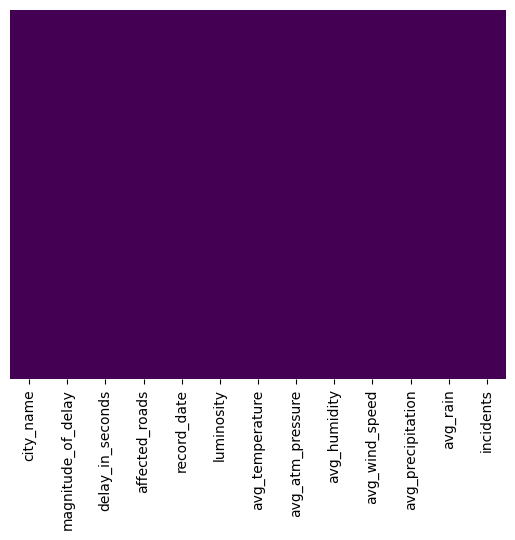

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
print(data.isna().sum())

city_name             0
magnitude_of_delay    0
delay_in_seconds      0
affected_roads        0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_precipitation     0
avg_rain              0
incidents             0
dtype: int64


In [17]:
print(data)

AttributeError: 'DataFrame' object has no attribute 'uniques'

Since 0 is the unique value of <em>avg_precipitation</em> and all entries have the same value, we will drop this feature:

In [12]:
data.drop("avg_precipitation", axis=1, inplace=True)

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None


The unique value of <em>city_name</em> is <em>Guimarães</em>. We can drop this feature as well.

In [13]:
data.drop("city_name", axis=1, inplace=True)
data.dropna(inplace=True)

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None


We will drop feature <em>affected_roads</em> also.

In [10]:
data.drop("affected_roads", axis=1)

Let's see the feature <em>incidents</em>:

In [22]:
print(data['incidents'].value_counts())

incidents
None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: count, dtype: int64


In [23]:
print(data['incidents'].value_counts().count())

5


In [20]:
plt.bar(data['incidents'], )

TypeError: bar() missing 1 required positional argument: 'height'

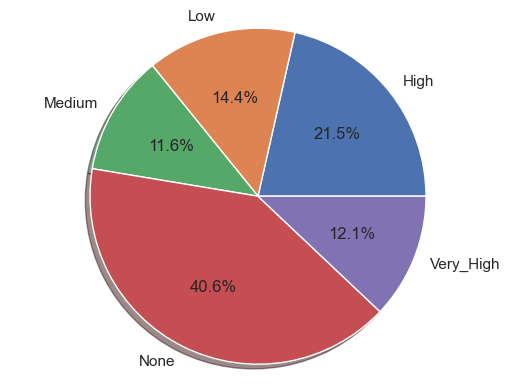

We will choose the factorize technique to keep going:

In [15]:
data['incidents'] = pd.factorize(data['incidents'])[0] + 1

Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will factorize as well.

In [16]:
data['magnitude_of_delay'] = pd.factorize(data['magnitude_of_delay'])[0] + 1
data['luminosity'] = pd.factorize(data['luminosity'])[0] + 1
data['avg_rain'] = pd.factorize(data['avg_rain'])[0] + 1

Now we need to choose how to convert <em>record_date</em> to <em>datetime</em>.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  5000 non-null   int64         
 1   delay_in_seconds    5000 non-null   int64         
 2   record_date         5000 non-null   datetime64[ns]
 3   luminosity          5000 non-null   int64         
 4   avg_temperature     5000 non-null   float64       
 5   avg_atm_pressure    5000 non-null   float64       
 6   avg_humidity        5000 non-null   float64       
 7   avg_wind_speed      5000 non-null   float64       
 8   avg_rain            5000 non-null   int64         
 9   incidents           5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 390.8 KB


## Exploratory Data Analysis

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,1,0,2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,1
1,1,385,2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,1
2,1,69,2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,2
3,2,2297,2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,3
4,1,0,2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,4


Let's analyze through a heatmap:

<Axes: >

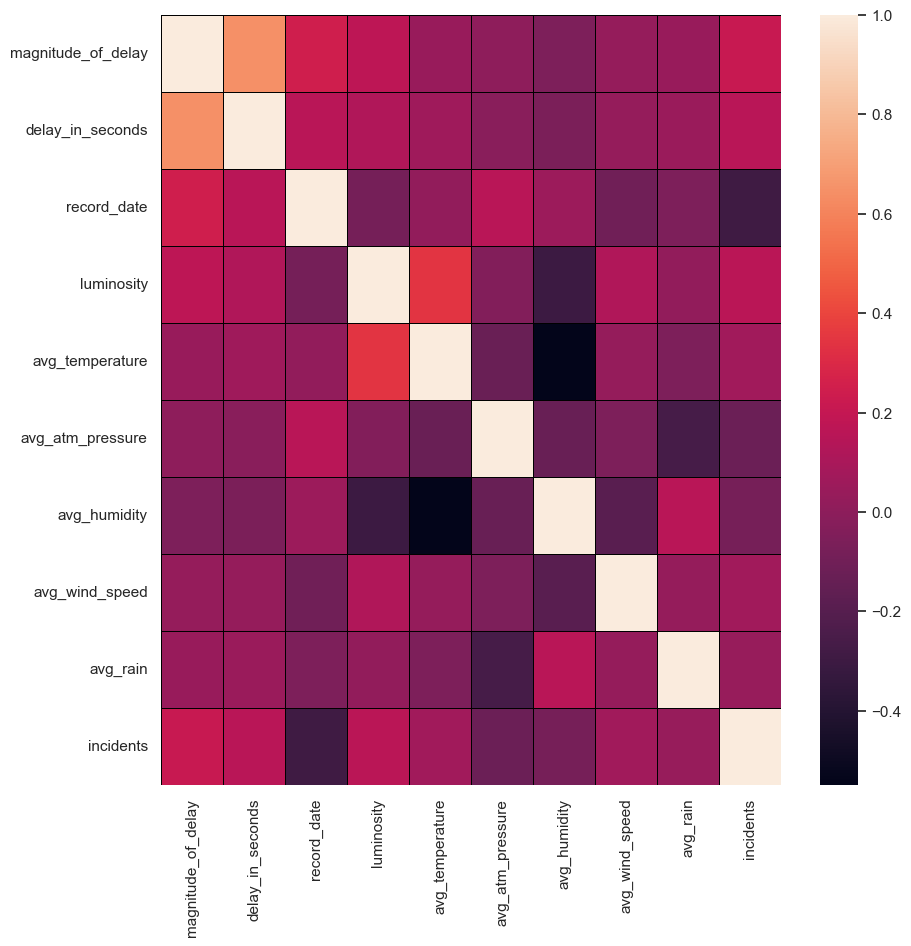

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot:

c:\Users\Admin\miniconda3\envs\envDAA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


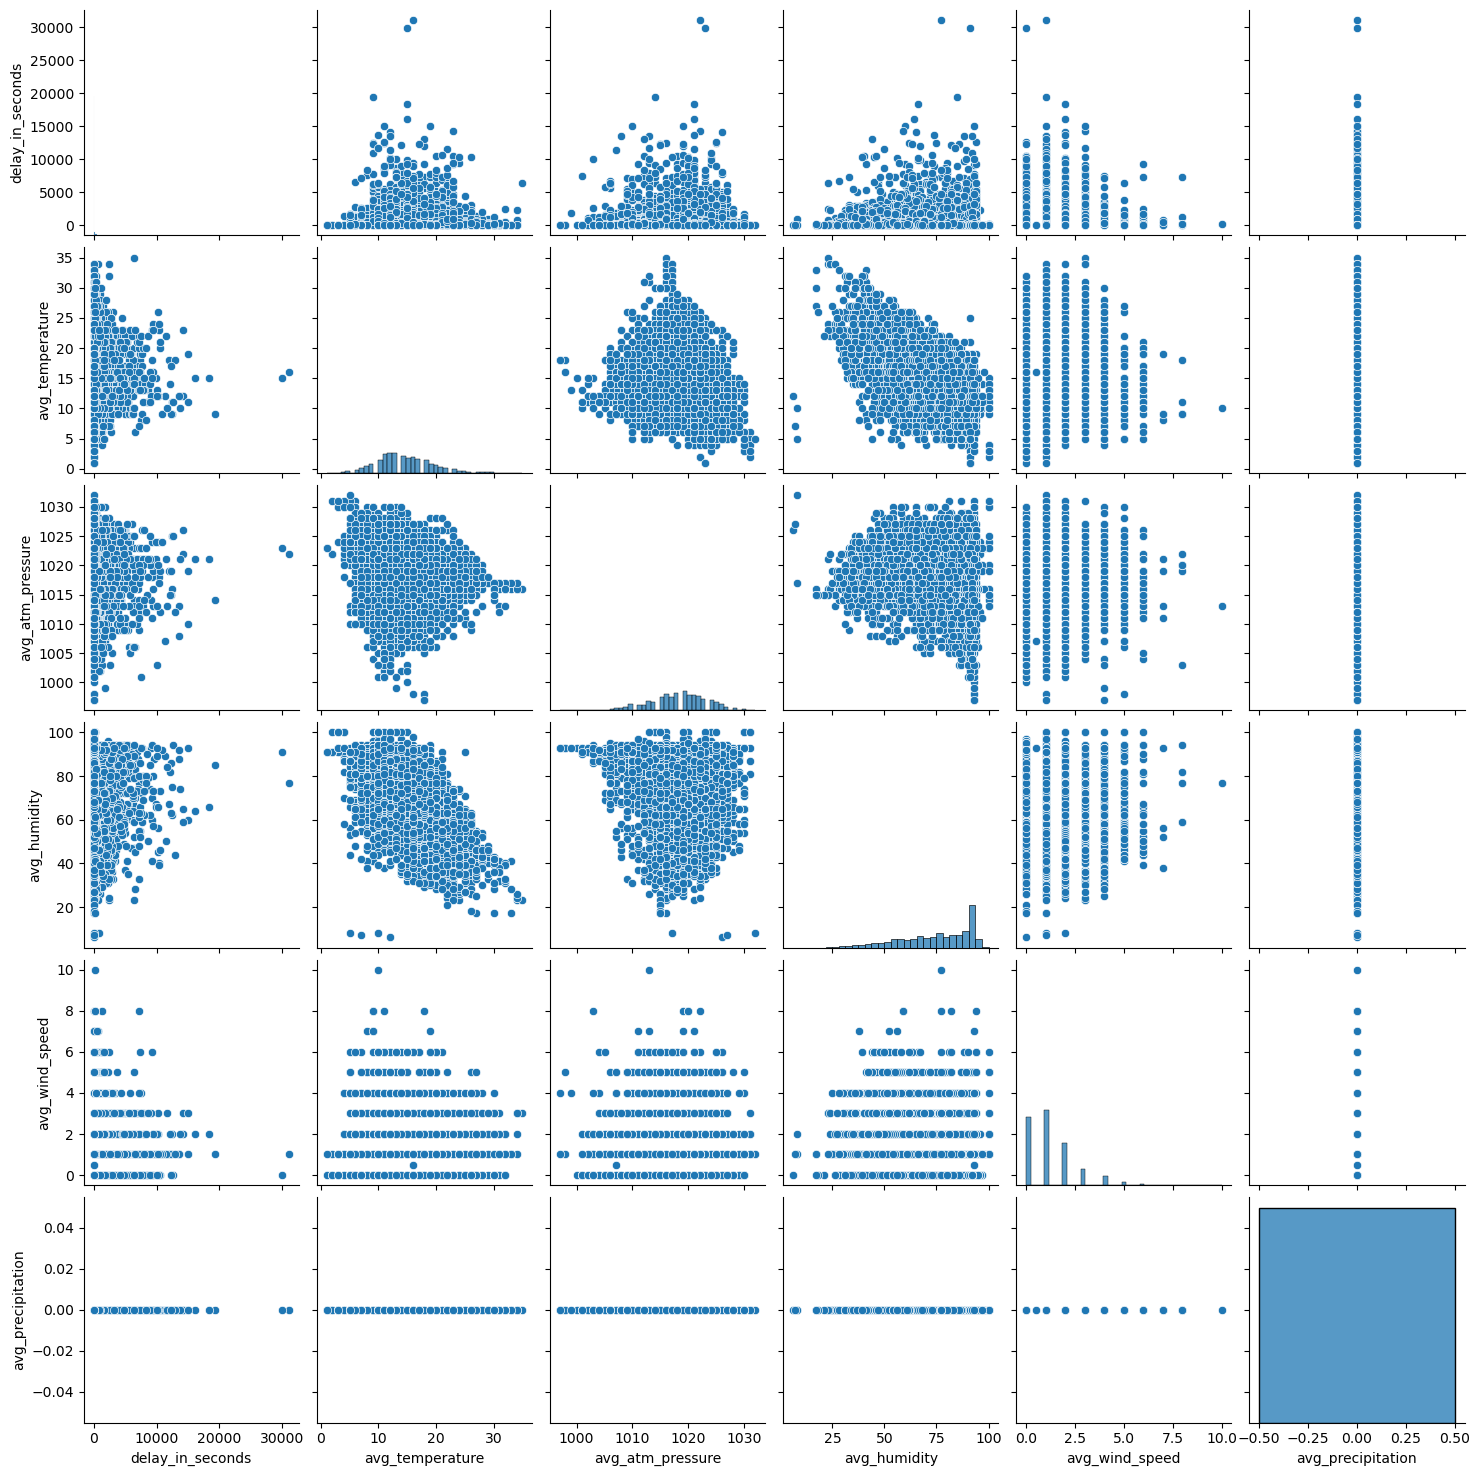

In [24]:
sns.pairplot(data)

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship:

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

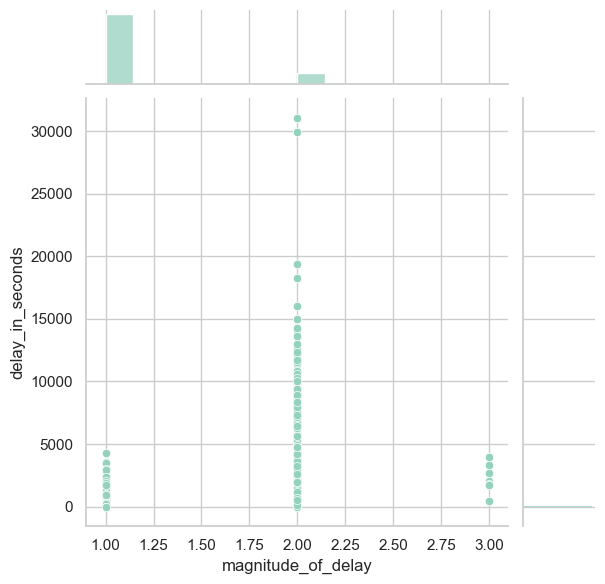

Jointplot <em>Luminosity vs. Avg_temperature</em>

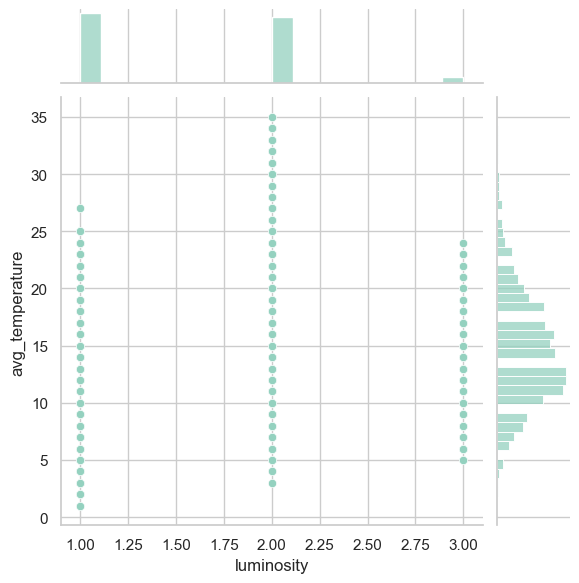

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

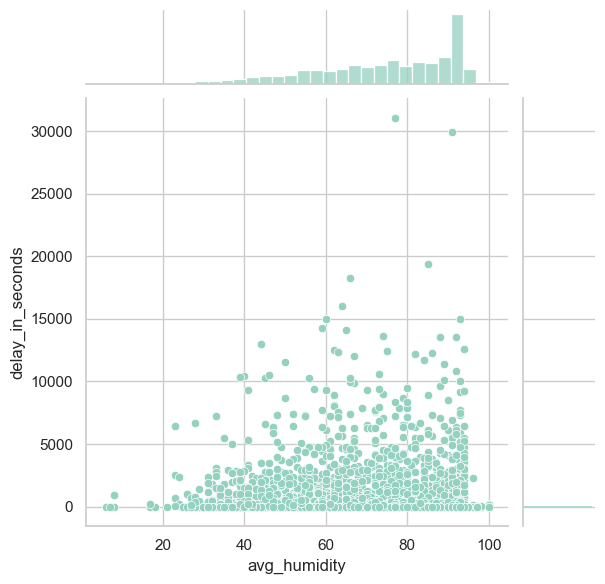

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

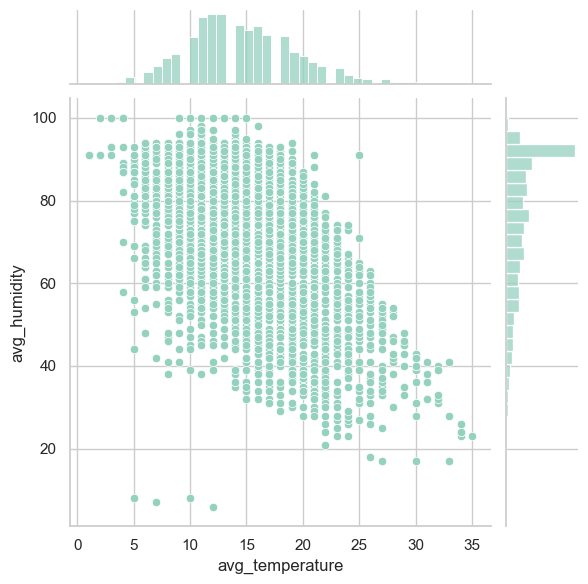

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>:

C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


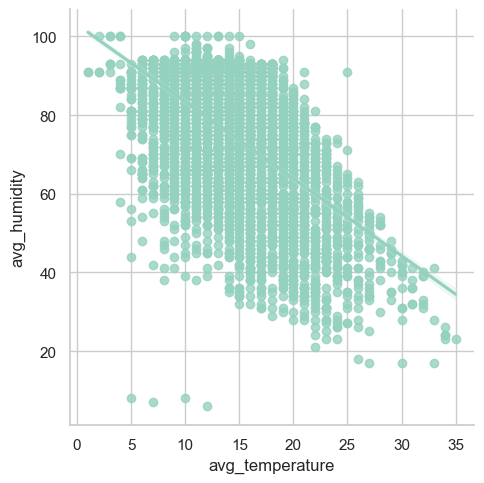

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  5000 non-null   int64         
 1   delay_in_seconds    5000 non-null   int64         
 2   record_date         5000 non-null   datetime64[ns]
 3   luminosity          5000 non-null   int64         
 4   avg_temperature     5000 non-null   float64       
 5   avg_atm_pressure    5000 non-null   float64       
 6   avg_humidity        5000 non-null   float64       
 7   avg_wind_speed      5000 non-null   float64       
 8   avg_rain            5000 non-null   int64         
 9   incidents           5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 390.8 KB


,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,1,0,2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,1
1,1,385,2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,1
2,1,69,2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,2
3,2,2297,2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,3
4,1,0,2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,4


### Train Test Split

Split the data into a training set and a testing set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop(['record_date','incidents'], axis=1)
y = data['incidents']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=2023)

## Train the models

Now it's time to train a **Decision Tree Classifier** and a **Support Vector Machine Classifier**.

Call the <em>DecisionTreeClassifier()</em> and <em>SVC()</em> model from sklearn and fit the model to the training data:

In [31]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [32]:
dt_model = DecisionTreeClassifier(random_state=2023)

In [33]:
svc_model = SVC(random_state=2023)

DecisionTreeClassifier(random_state=2022)

SVC(random_state=2022)

#### 1. Plot the resultant tree (plot_tree) and save it as figure (.png)

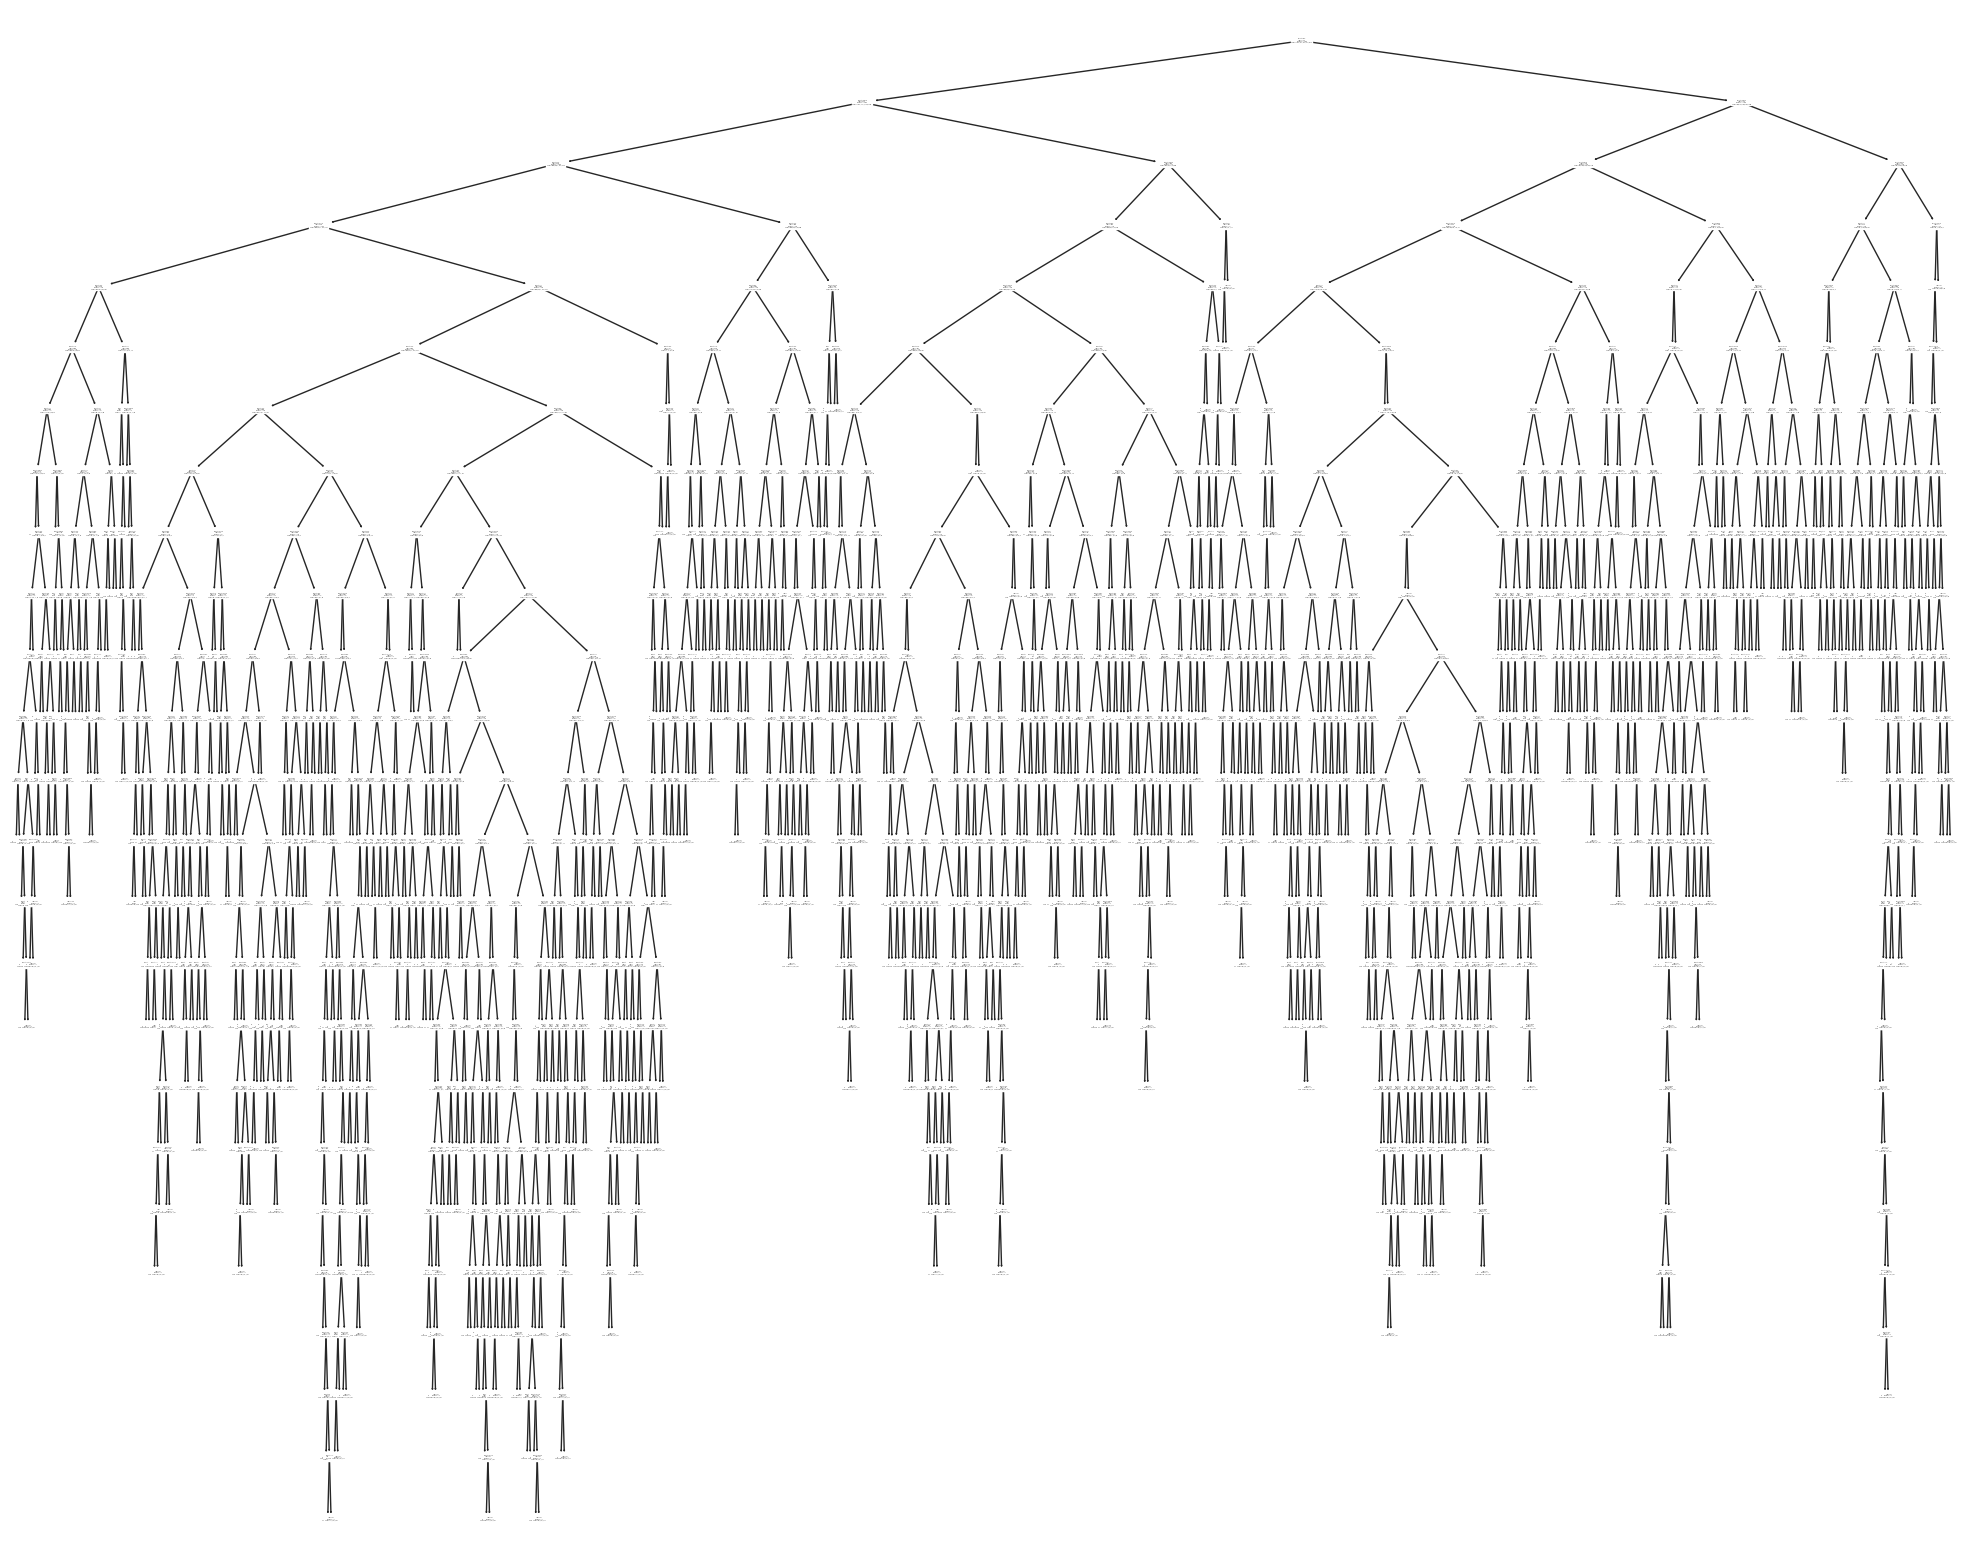

#### 2. Using export_text to represent the tree. Save it in a log file

|--- feature_1 <= 25.00
|   |--- feature_4 <= 1020.50
|   |   |--- feature_5 <= 91.50
|   |   |   |--- feature_4 <= 1011.50
|   |   |   |   |--- feature_3 <= 15.50
|   |   |   |   |   |--- feature_3 <= 11.50
|   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |--- feature_4 <= 1002.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  1002.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 10.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  10.50
|   |   |   |   |   |   |  

## Model evaluation

Let's get predictions from the model and create a confusion matrix and a classification report

**Decision Tree**

              precision    recall  f1-score   support

           1       0.75      0.74      0.74       632
           2       0.58      0.55      0.56       201
           3       0.72      0.73      0.73       179
           4       0.46      0.49      0.47       313
           5       0.40      0.42      0.41       175

    accuracy                           0.62      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.62      0.62      0.62      1500



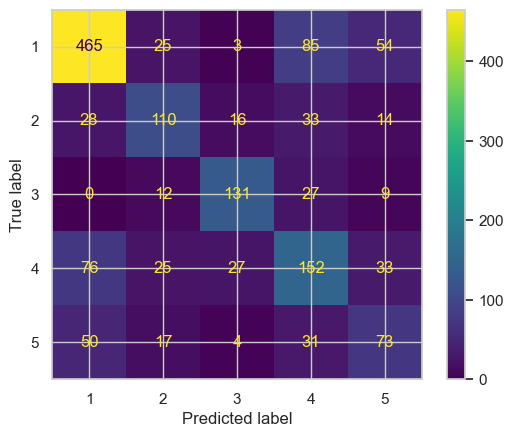

**Support Vector Machine**

              precision    recall  f1-score   support

           1       0.57      0.98      0.72       632
           2       0.43      0.41      0.42       201
           3       0.77      0.71      0.74       179
           4       0.47      0.08      0.13       313
           5       0.00      0.00      0.00       175

    accuracy                           0.57      1500
   macro avg       0.45      0.44      0.40      1500
weighted avg       0.49      0.57      0.47      1500



C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


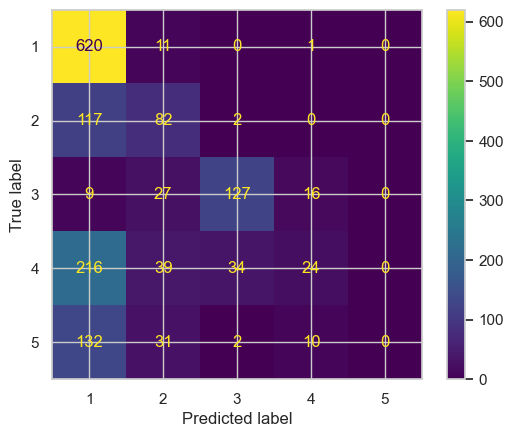

Let's see if we can tweak the parameters to try and get even better results. It's unlikely, and these results are satisfactory given that the data set is quite small, but the aim is to practise using **GridSearchCV**.

**Decision Tree**

24
1189


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

**Support Vector Classifier**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(random_state=2022),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

Now let's take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Did you manage to improve?

**Decision Tree**

              precision    recall  f1-score   support

           1       0.68      0.93      0.78       632
           2       0.55      0.71      0.62       201
           3       0.79      0.75      0.77       179
           4       0.52      0.22      0.31       313
           5       0.40      0.16      0.23       175

    accuracy                           0.64      1500
   macro avg       0.59      0.55      0.54      1500
weighted avg       0.61      0.64      0.60      1500



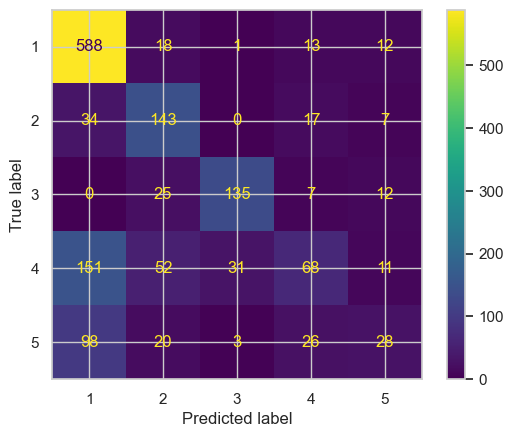

**Support Vector Classifier**

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       632
           2       0.57      0.46      0.51       201
           3       0.59      0.82      0.68       179
           4       0.44      0.32      0.37       313
           5       0.38      0.15      0.21       175

    accuracy                           0.61      1500
   macro avg       0.54      0.53      0.51      1500
weighted avg       0.58      0.61      0.58      1500



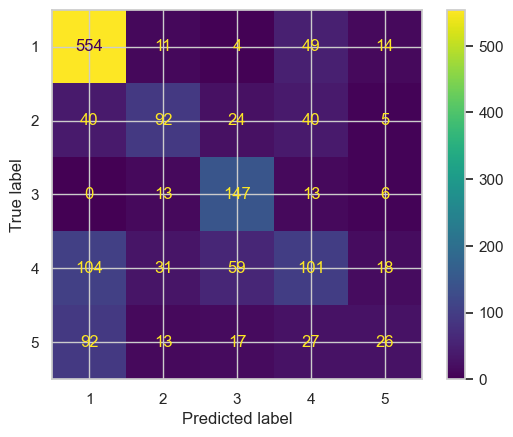

## Pruning

A Decision Tree is pruned by replacing an entire subtree with a leaf node. If the expected error rate in the subtree is higher than that of a single leaf, it is replaced.

24
1189


#### Best Depth Tree

24

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24]})

You can inspect the best parameters found by GridSearchCV in the <em>best_params_</em> attribute and the best estimator in the <em>best\_estimator_</em> attribute:

{'max_depth': 6}

DecisionTreeClassifier(max_depth=6, random_state=42)


6


#### 1. Plot the tree (dpi=1000)

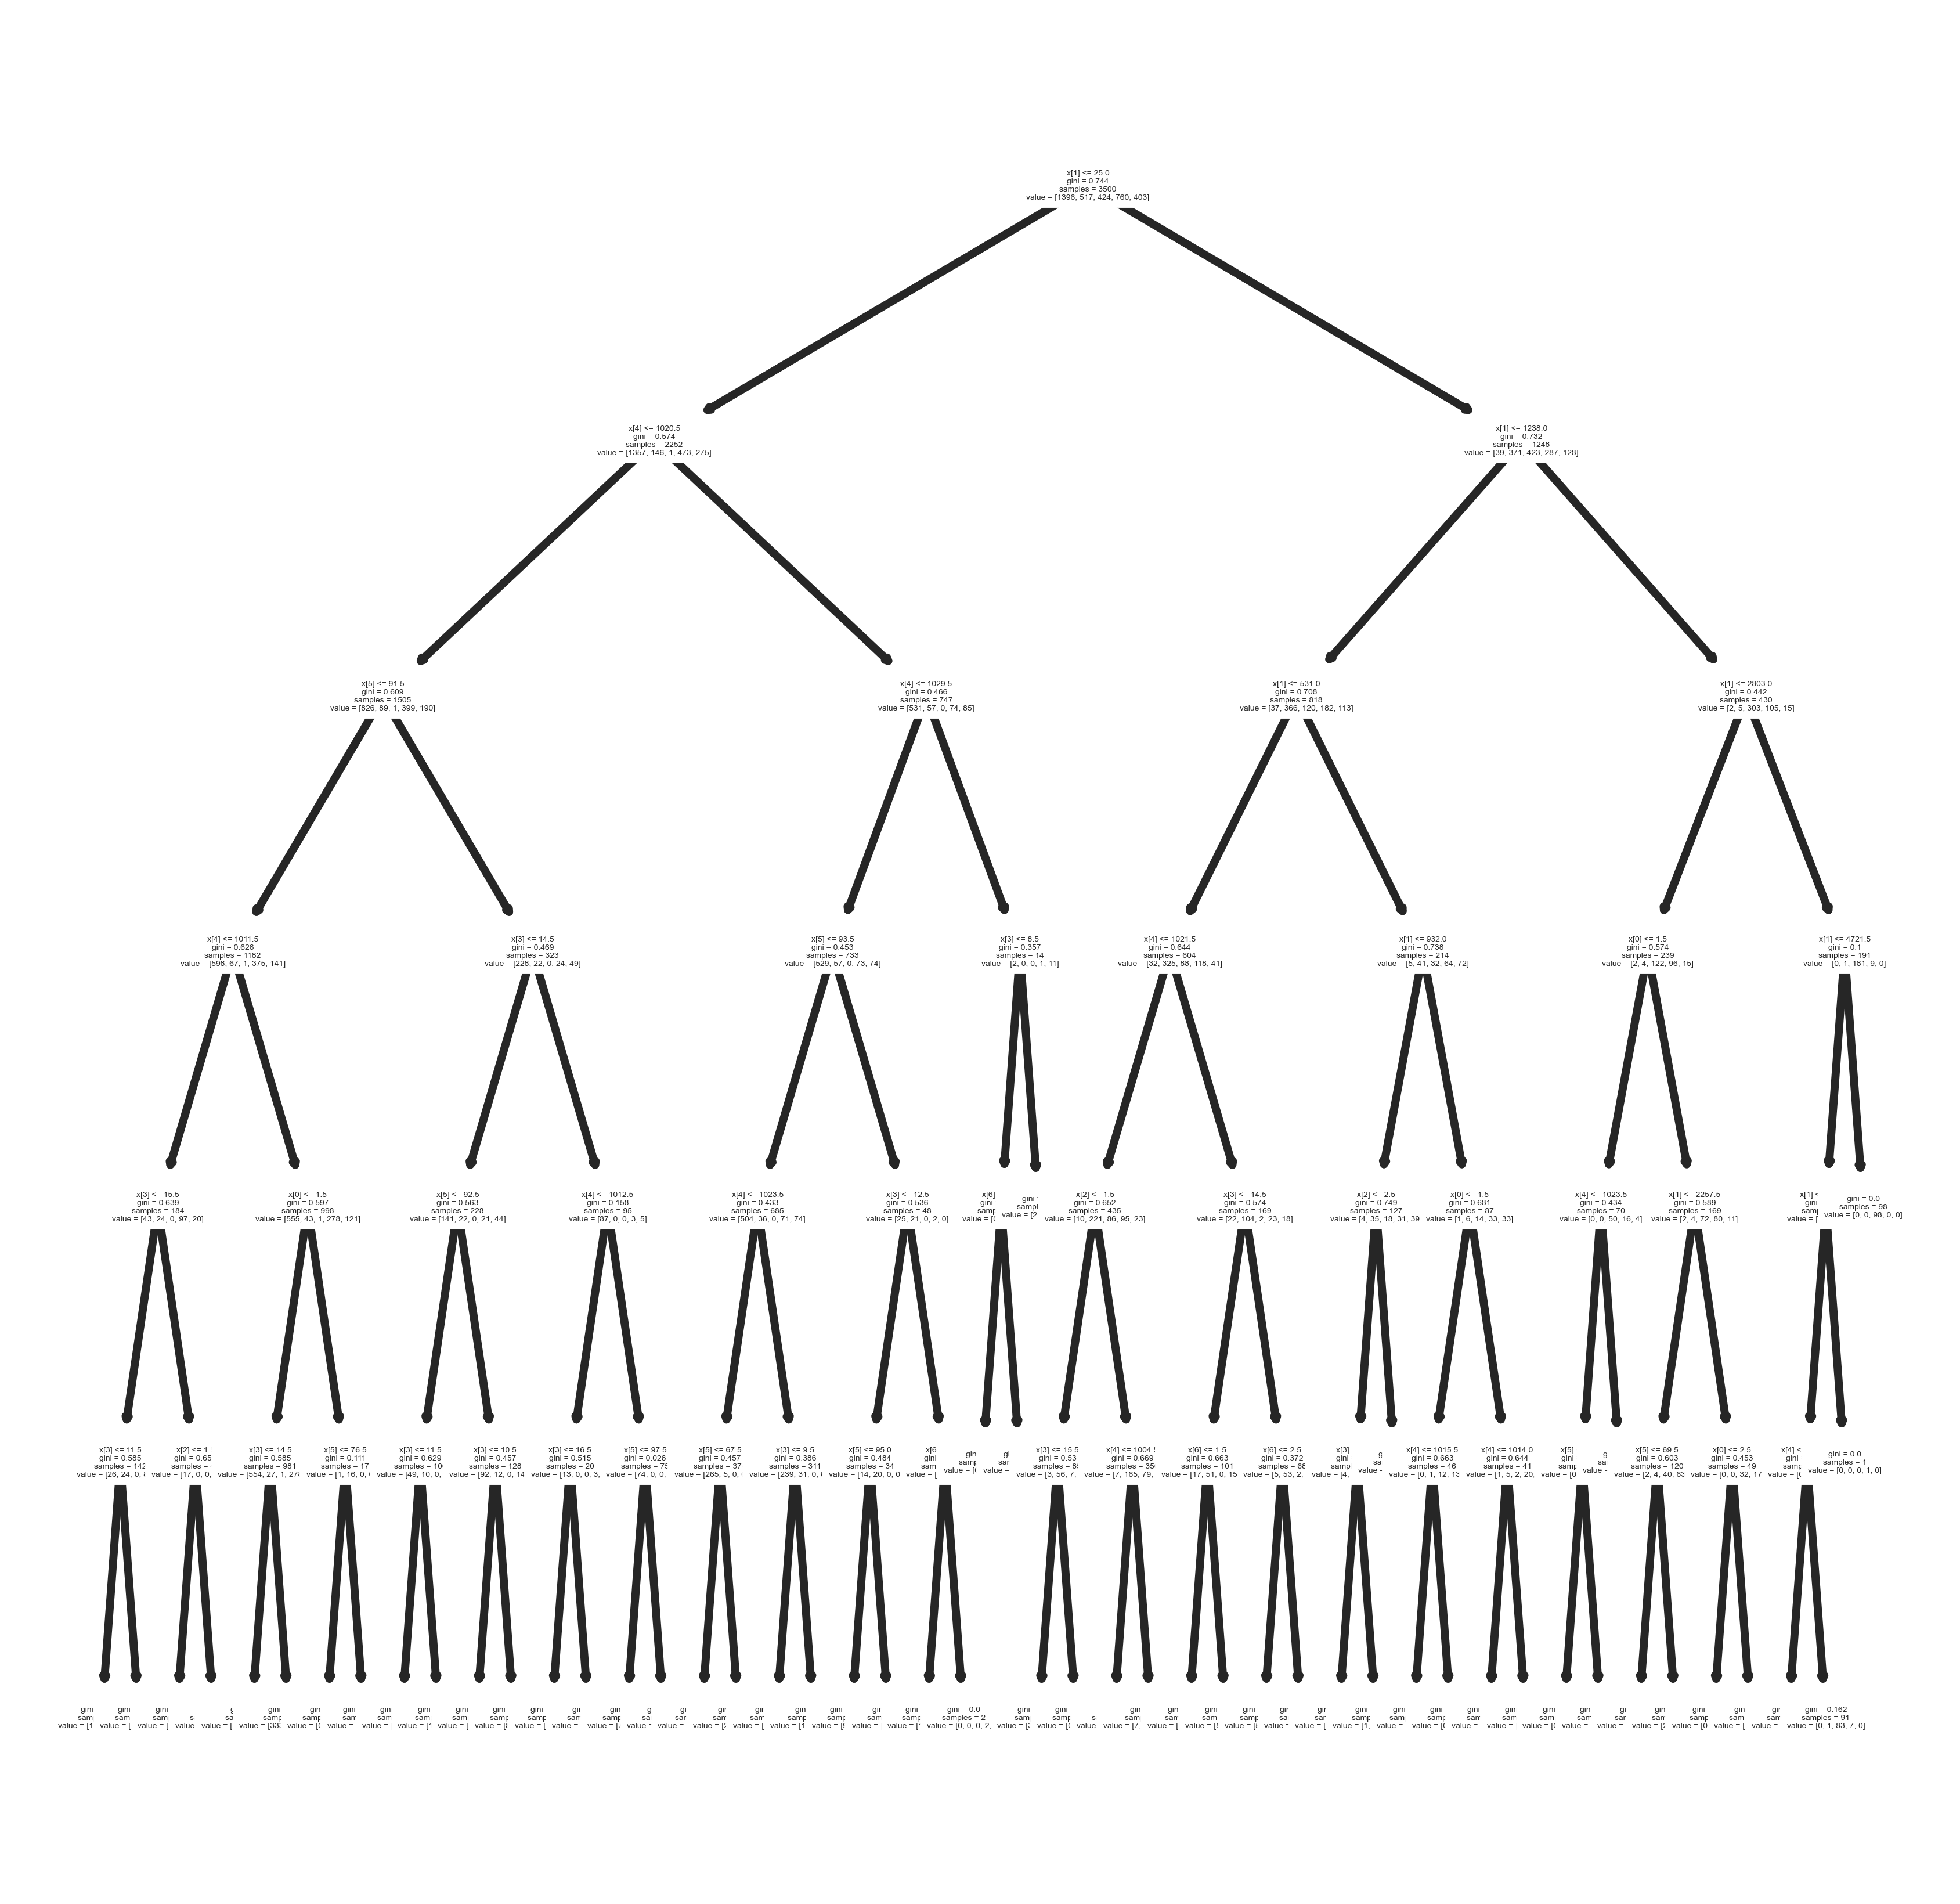

#### 2. Evaluate the model with confusion matrix  and classification report

              precision    recall  f1-score   support

           1       0.68      0.93      0.78       632
           2       0.55      0.71      0.62       201
           3       0.79      0.75      0.77       179
           4       0.52      0.22      0.31       313
           5       0.40      0.16      0.23       175

    accuracy                           0.64      1500
   macro avg       0.59      0.55      0.54      1500
weighted avg       0.61      0.64      0.60      1500



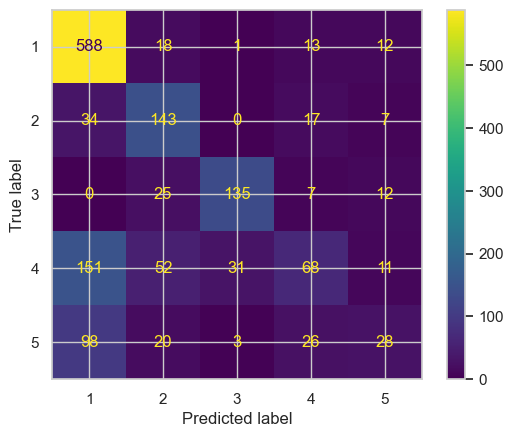

### Cost Complexity Pruning

Another pruning technique

array([0.00000000e+00, 1.90476190e-05, 2.38095238e-05, 3.78151261e-05,
       4.76190476e-05, 6.66666667e-05, 7.14285714e-05, 7.14285714e-05,
       7.61904762e-05, 7.61904762e-05, 8.57142857e-05, 9.52380952e-05,
       9.52380952e-05, 9.52380952e-05, 9.52380952e-05, 9.52380952e-05,
       1.08843537e-04, 1.14285714e-04, 1.22448980e-04, 1.36645963e-04,
       1.39097744e-04, 1.40394089e-04, 1.42857143e-04, 1.58730159e-04,
       1.59663866e-04, 1.61904762e-04, 1.63265306e-04, 1.70068027e-04,
       1.71428571e-04, 1.71428571e-04, 1.71428571e-04, 1.72397220e-04,
       1.74603175e-04, 1.74603175e-04, 1.75824176e-04, 1.77777778e-04,
       1.79271709e-04, 1.80952381e-04, 1.82539683e-04, 1.82857143e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       2.11640212e-04, 2.11640212e-04, 2.11764706e-04, 2.14285714e-04,
      

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 1.9047619047619165e-05,
                                       2.380952380952382e-05,
                                       3.781512605042028e-05,
                                       4.761904761904764e-05,
                                       6.66666666666668e-05,
                                       7.142857142857141e-05,
                                       7.142857142857141e-05,
                                       7.619047619047612e-05,
                                       7.619047619047612e-05,
                                       8.571428571428564e-05,
                                       9.523809523809517e-05,
                                       9.52380952380951...
                                       9.523809523809528e-05,
                                       9.523809523809528e-05,
                                       0.00010884353741496611,
                                       0.00011428571428571434,
                                       0.00012244897959183695,
                                       0.00013664596273291928,
                                       0.00013909774436090213,
                                       0.00014039408866995095,
                                       0.00014285714285714281,
                                       0.00015873015873015873,
                                       0.00015966386554621846,
                                       0.00016190476190476184,
                                       0.000163265306122449,
                                       0.00017006802721088437,
                                       0.0001714285714285713,
                                       0.0001714285714285713, ...]})

{'ccp_alpha': 0.0008316875137151618}

DecisionTreeClassifier(ccp_alpha=0.0008316875137151618, random_state=42)


#### 1. Plot the tree

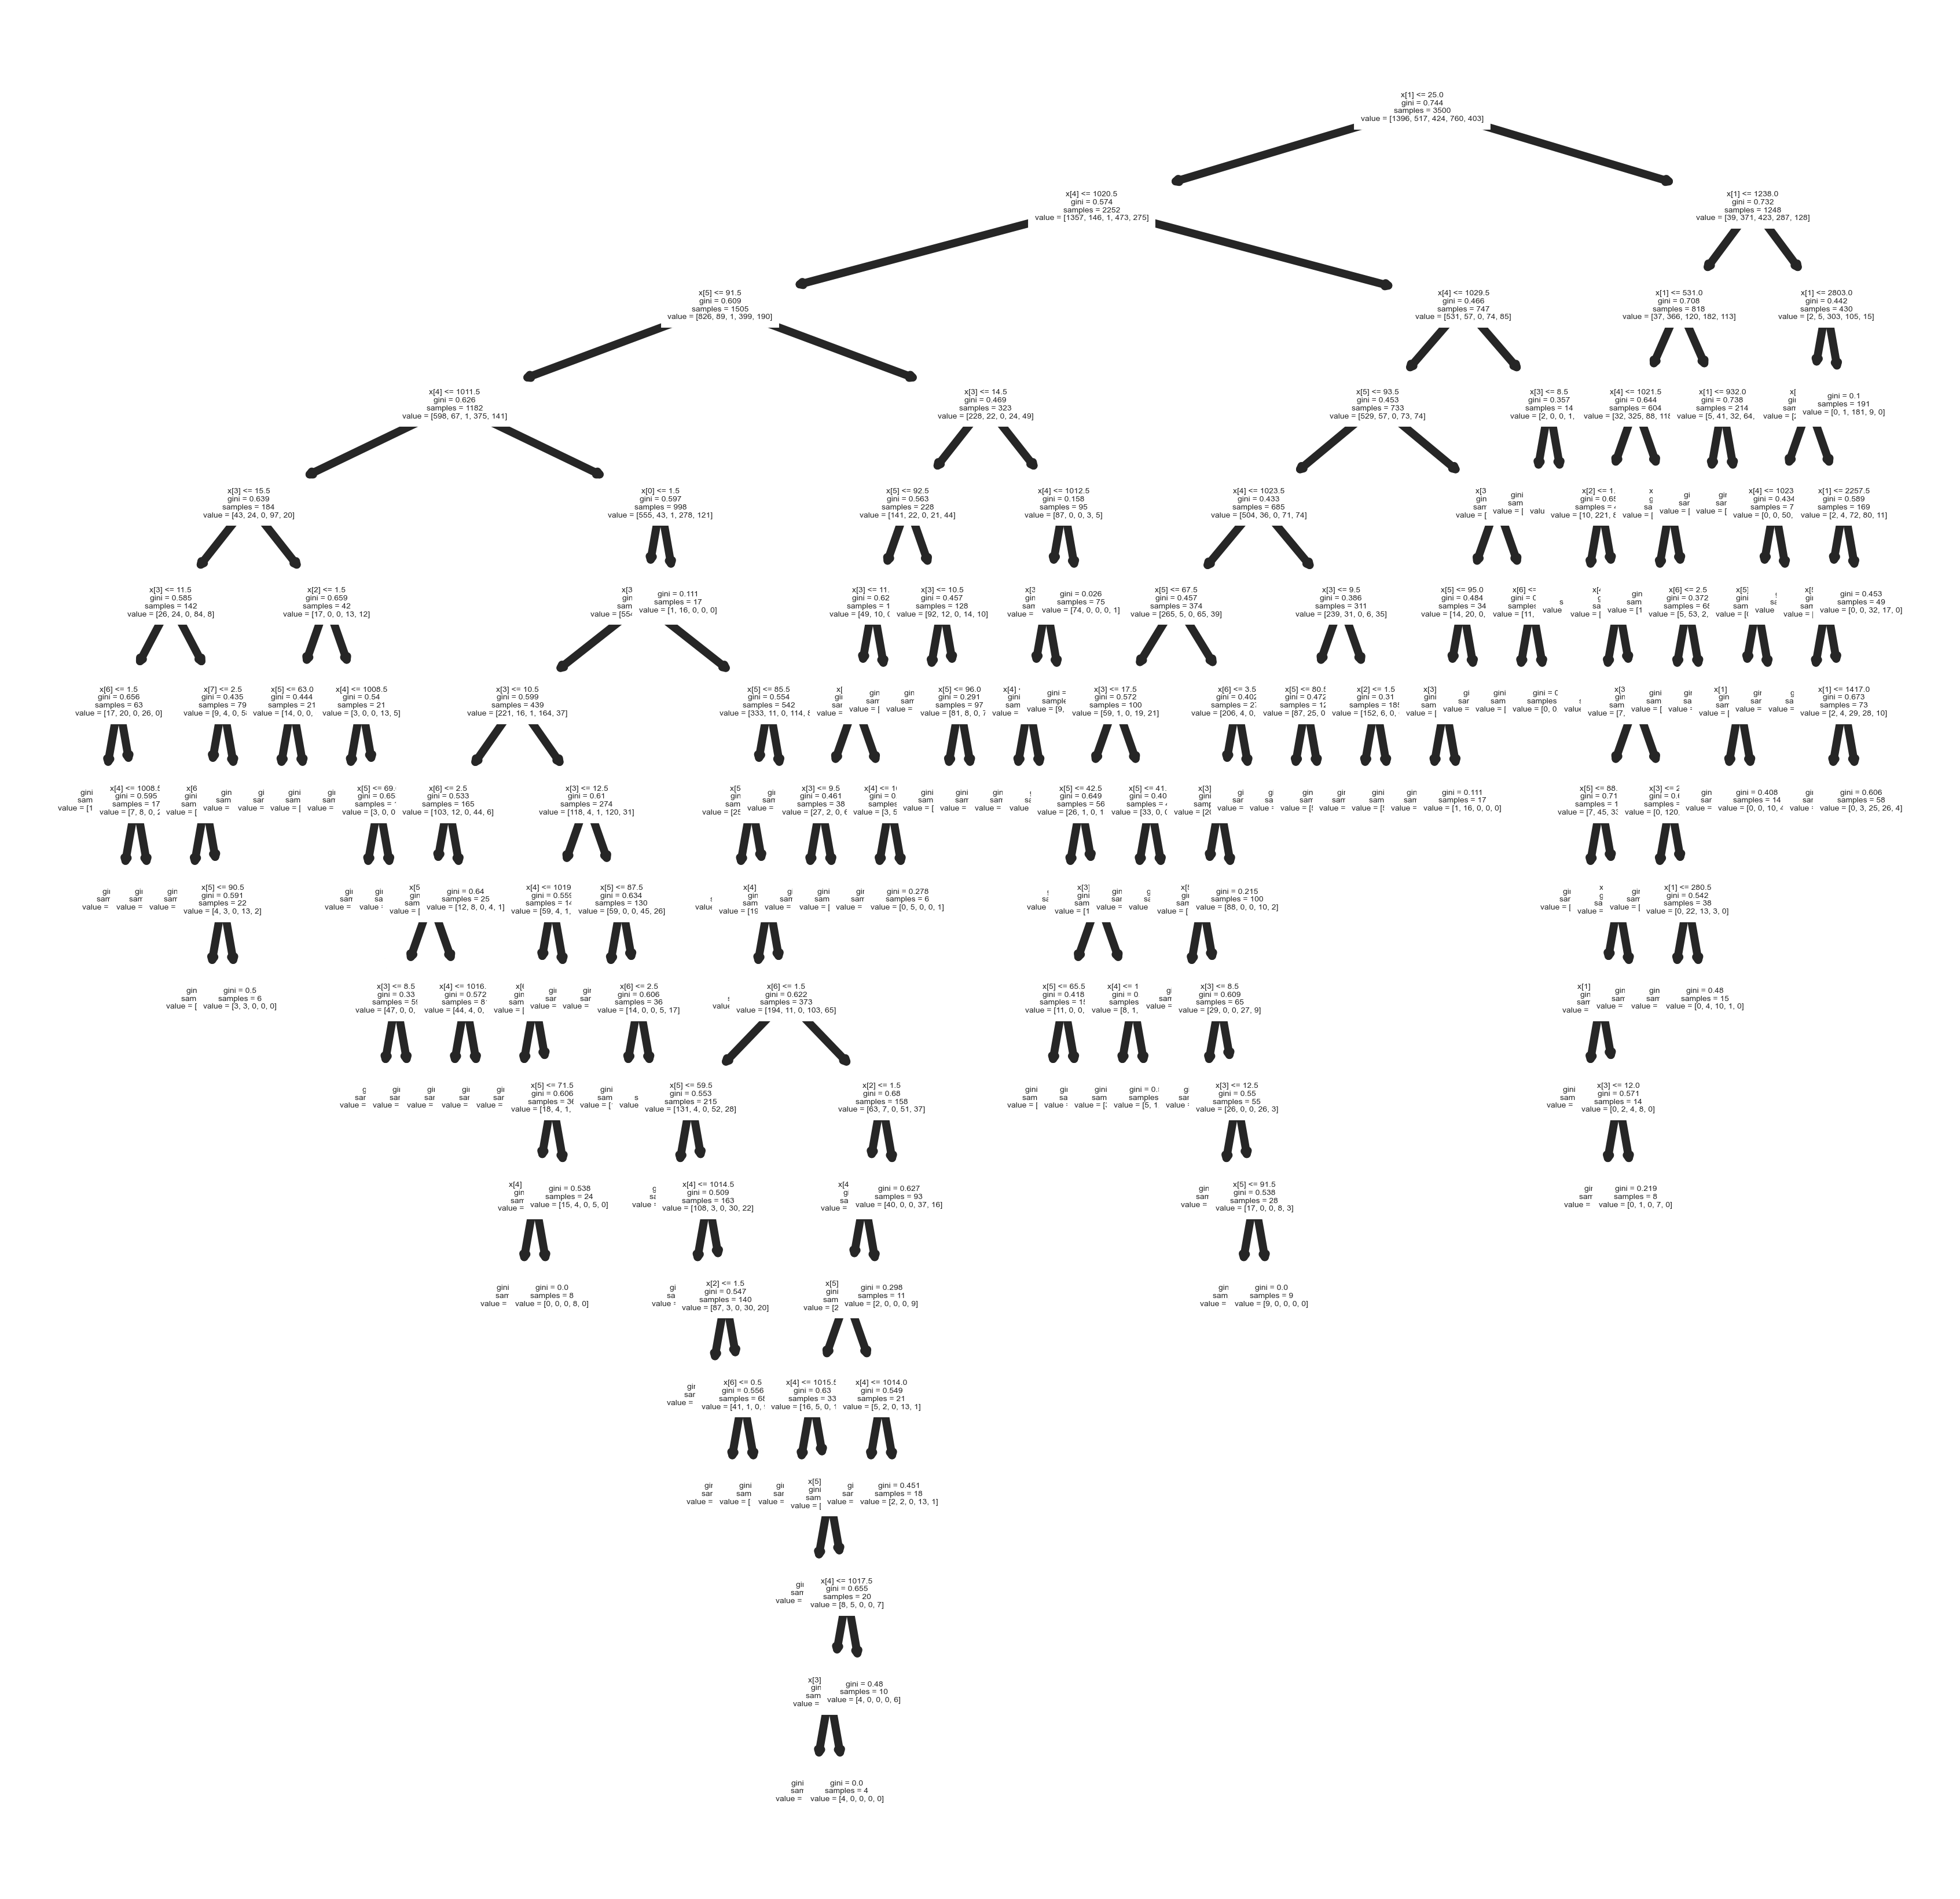

#### 2. Evaluate the model with confusion matrix  and classification report

              precision    recall  f1-score   support

           1       0.72      0.82      0.76       632
           2       0.56      0.63      0.59       201
           3       0.78      0.74      0.76       179
           4       0.53      0.33      0.41       313
           5       0.38      0.39      0.39       175

    accuracy                           0.63      1500
   macro avg       0.59      0.58      0.58      1500
weighted avg       0.62      0.63      0.62      1500



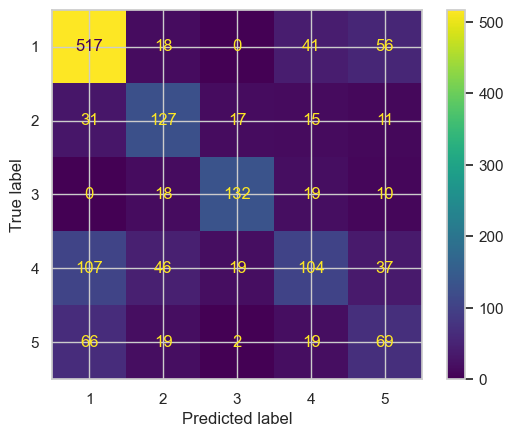